<a href="https://colab.research.google.com/github/timsetsfire/m4ml/blob/main/Linear_Algebra_(M4ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Algebra

As mentioned, Linear Algebra is very important in ML.  In this notebook, we'll cover (briefly) 

* Working with matrices and n dimensional arrays in numpy.

* Solving the least squares (linear regression) problem directly

* Advanced - completing Principal Components Analysis via SVD



## Working with matrices in numpy

We'll be using the matrix class in numpy.  Numpy matrices are strictly 2D.  Numpy NDArrays are arbitrary.  When moving into higher dimensions that 2D (such as in deep learning) you will need to make the switch to NDArrays.  

## scipy.linalg vs numpy.linalg

`scipy.linalg` contains all the functions in `numpy.linalg`. plus some other more advanced ones not contained in `numpy.linalg`

see https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html for more details

## Matrix Operations

Below we'll demonstrate how to do some important operations necessary for regression from scracth, and we'll only highlight operations on matrices vs ndarrays when worth noting.

## Creating a matrix

In [69]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [70]:
x = np.matrix([[2,7,6],[9,5,1],[4,3,8]])
print(type(x))
print(x)
# or
x_ndarray = np.array([[2,7,6],[9,5,1],[4,3,8]])
print("\n{}".format(type(x_ndarray)))
print(x_ndarray)

<class 'numpy.matrix'>
[[2 7 6]
 [9 5 1]
 [4 3 8]]

<class 'numpy.ndarray'>
[[2 7 6]
 [9 5 1]
 [4 3 8]]


The [magic square](https://en.wikipedia.org/wiki/Magic_square) above (call it $X$) is composed of 3 rows and 3 columns.  We will index elements by the row and column in which they appear.  For example, the element $X_{1,2}$ is 7 and $X_{3,3} = 8$.  Note that we are starting indexing from 1 and not 0.  We will index starting from 0 in our code

Generally, we will have a matrix $X$ of dimension $m \times n$, that is, $m$ rows and $n$ columns.  We'll use the following notations to refer to entire columns and rows very succinctly,  $(:,j)$ and $(i,:)$ which means all elements in the $j^{th}$ column and all elements in the $i^{th}$ row, repsectively.

### Transpose of a Matrix

Very fundamental operation is transposition - this is switching the row index with the column index for each element.  

In [71]:
print("X")
print(x)
print("\nX'")
print(x.T)

X
[[2 7 6]
 [9 5 1]
 [4 3 8]]

X'
[[2 9 4]
 [7 5 3]
 [6 1 8]]


### Slicing a matrix

Very often we'll be interested in a particular row or column or sub-matrix of a matrix.

In [72]:
# slicing
# first row
print("slicing a matrix\n")
print(x[0,:])
print("\nshape of x[0,:] is {}".format( x[0,:].shape))
print("\nvs slicing an ndarray\n")
print(x_ndarray[0,:])
print("\nshape of x_ndarray[0:] is {}".format(x_ndarray[0,:].shape))

slicing a matrix

[[2 7 6]]

shape of x[0,:] is (1, 3)

vs slicing an ndarray

[2 7 6]

shape of x_ndarray[0:] is (3,)


In [73]:
# slicing
# first column
print("slicing a matrix\n")
print(x[:,0])
print("\nshape of x[:,0] is {}".format( x[0,:].shape))
print("\nvs slicing an ndarray\n")
print(x_ndarray[:,0])
print("\nshape of x_ndarray[:,0] is {}".format(x_ndarray[0,:].shape))

slicing a matrix

[[2]
 [9]
 [4]]

shape of x[:,0] is (1, 3)

vs slicing an ndarray

[2 9 4]

shape of x_ndarray[:,0] is (3,)


In [74]:
# slicing 
# top 2x2 matrix
print(x[0:2,0:2])


[[2 7]
 [9 5]]


### Vectors

A vector is an array of numbers.  You could think of each row or each column of a matrix as a vector.  If $x$ is a vector of length $N$ we write $x \in \mathbb{R}^N$.  This is a succinct way to write a n-dimensional space where each dimension is represented by a real number ($\mathbb{R}$ means the set of real numbers))

### Dot Product

Given two vectors $x,y$ in $\mathbb{R}^n$, the dot product (or inner product) of $x$ and $y$, written $x\cdot y$ or sometimes $\left<x,y\right>$ is defined as 
$$\left<x,y\right> = \sum_{i=1}^n x_i y_i$$

For $x = y$, the square root of the dot product is called the $L_2$ norm or Euclidean norm and may be written $\|x\|_2$.    
If $x$ sums to zero ($x$ is centered), then $\|x\|_2^2$  divided by the length of $x$ minus 1 is the sample variance.  

## Inner product and correlation coefficient.  

For any two vectors $x,y \in \mathbb{R}^N$, we have 

$$\cos(\theta) = \frac{x\cdot y}{\|x\|\|y\|}$$

where $\theta$ is the angle between $x$ and $y$.  If $x$ and $y$ both sum to 0 then $\cos(\theta)$ is the correlation between $x$ and $y$.  Why?  because $\left<x,y\right>$ is the sample covariance and $\|x\|, \|y\|$ are the sample standard deviations of $x$ and $y$ respectively.


### Matrix Multiplication 

See https://en.wikipedia.org/wiki/Matrix_multiplication#Examples_of_matrix_products for more details.  

If $A$ is $m \times n$ and $B$ is $n \times p$, then the product $C = AB$ is $m \times p$ and the 

$i,j$ element of $C$ is defined as 

$$C_{i,j} = A_{i,:} \cdot B_{:,j} = \sum_{k=1}^n A_{i,k}B_{k,j}$$

Or we could say that the $i,j$ element of $C$ is the dot product of the $i^{th}$ row of $A$ and the $j^{th}$ column of $B$. 

__Note__ matrix multiplication does not necessarily commute.  Also, the number of columns in the first matrix must be equal to the number of rows in the second matrix.  

More concrete example: matrix multiplication between a matrix $X$ and a column vector $\beta$.  

If $$X = \begin{pmatrix}
x_{1,1} & x_{1,2} & x_{1,3} \\
x_{2,1} & x_{2,2} & x_{2,3} \\
x_{3,1} & x_{3,2} & x_{3,3}
\end{pmatrix} \text{ and } \beta = \begin{pmatrix}
b_1 \\
b_2 \\
b_3
\end{pmatrix}$$, then 


$$X\beta = \begin{pmatrix}
x_{1,1} & x_{1,2} & x_{1,3} \\
x_{2,1} & x_{2,2} & x_{2,3} \\
x_{3,1} & x_{3,2} & x_{3,3}
\end{pmatrix} \begin{pmatrix}
b_1 \\
b_2 \\
b_3
\end{pmatrix} =\begin{pmatrix}
x_{1,1}b_1 + x_{1,2}b_2 + x_{1,3}b_3 \\
x_{2,1}b_1 + x_{2,2}b_2 + x_{2,3}b_3 \\
x_{3,1}b_1 + x_{3,2}b_2 + x_{3,3}b_3
\end{pmatrix}$$



In [75]:
# dot product
z = np.array([1,2,3])
z.dot(z)

14

In [76]:
# matrix multiply
print(x @ x)

# same as 
y = np.zeros([3,3])
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        y[i][j] = x[i,:].dot(x[:,j])
print()
print(y)

[[91 67 67]
 [67 91 67]
 [67 67 91]]

[[91. 67. 67.]
 [67. 91. 67.]
 [67. 67. 91.]]


### Hadamard Product

For two matrices $A$ and $B$ the Hadamard Product, written $A \odot B$, is element wise multiplicate, thus dimensin of $A$ must equal dimension of $B$.  We won't encounter this operator now, but it will be very common in the training of neural networks

In [77]:
# hadamard product -- element-wise multiplication
print(x)
print("\n")
print(np.multiply(x,x))

[[2 7 6]
 [9 5 1]
 [4 3 8]]


[[ 4 49 36]
 [81 25  1]
 [16  9 64]]


### Identity Matrices and Matrix Inversion

In [78]:
# identity matrix
I = np.eye(3)

print("3x3 Identity matrix\n", I, "\n")
print("x*I\n",x * I,"\n")
print("I*x\n",I * x)

3x3 Identity matrix
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

x*I
 [[2. 7. 6.]
 [9. 5. 1.]
 [4. 3. 8.]] 

I*x
 [[2. 7. 6.]
 [9. 5. 1.]
 [4. 3. 8.]]


In [79]:
# inverting a square matrix
print("x^{-1}\n",np.linalg.inv(x),"\n")
print("x*x^{-1}\n", np.round(x*np.linalg.inv(x),2),"\n")
print("x^{-1}*x\n", np.round(np.linalg.inv(x)*x,2))

x^{-1}
 [[-0.10277778  0.10555556  0.06388889]
 [ 0.18888889  0.02222222 -0.14444444]
 [-0.01944444 -0.06111111  0.14722222]] 

x*x^{-1}
 [[ 1. -0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]] 

x^{-1}*x
 [[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]


In [80]:
# inverting a non-square matrix via pseudo inverse https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse#Definition
a = np.random.rand(10, 5)
B = np.linalg.pinv(a)
np.round(B @ a, 3)


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -0.,  0., -0.],
       [ 0.,  0.,  1., -0., -0.],
       [-0., -0.,  0.,  1., -0.],
       [-0., -0., -0., -0.,  1.]])

## Other useful operations



In [81]:
# multiplication by scalar
p = 1/15 * x
p

matrix([[0.13333333, 0.46666667, 0.4       ],
        [0.6       , 0.33333333, 0.06666667],
        [0.26666667, 0.2       , 0.53333333]])

In [82]:
# sum columns
print( p.sum(axis=0))
print()
# sum rows 
print( p.sum(axis=1))

[[1. 1. 1.]]

[[1.]
 [1.]
 [1.]]


In [83]:
# mean and standard deviation of columns
print( x.mean(axis=0), x.std(axis=0))
# mean of rows - just set axis=1

[[5. 5. 5.]] [[2.94392029 1.63299316 2.94392029]]


In [84]:
## numpy funtions act element-wise on matrices and arrays
np.exp(p)

matrix([[1.14263081, 1.59466976, 1.4918247 ],
        [1.8221188 , 1.39561243, 1.06893911],
        [1.30560517, 1.22140276, 1.70460487]])

In [85]:
## for functions of matrices look into scipy.linalg, e.g., exponetial of matrix
from scipy.linalg import expm
print(expm(p))

[[1.40505877 0.69054062 0.62268243]
 [0.826257   1.60863334 0.28339149]
 [0.48696606 0.41910787 1.81220791]]


In [86]:
## powers of a matrix
from math import factorial as f

#np.eye(3) + p + 1/2*p*p + 1/6*p*p*p + 1/24*p*p*p*p + 1/120*p*p*p*p*p + ....
e = np.eye(3)
for i in range(1,10):
    e += 1/f(i)*np.linalg.matrix_power(p,i)
print(e)
print("\n",np.linalg.norm(e - expm(p)))

[[1.40505867 0.69054052 0.62268233]
 [0.8262569  1.60863324 0.28339139]
 [0.48696595 0.41910777 1.81220781]]

 3.028858527985199e-07


In [87]:
# matrix of ones
bias = np.matrix(np.ones([3,1]))
# joining the matrix of ones with our matrix x1 from above
# very common for regression problems
x2 = np.concatenate( [bias, x],axis=1)
print(x2)
print()
# to append the bias as a row, we'll do the following
x3 = np.concatenate( [x2, np.ones([1,4])],axis=0)
print(x3)

[[1. 2. 7. 6.]
 [1. 9. 5. 1.]
 [1. 4. 3. 8.]]

[[1. 2. 7. 6.]
 [1. 9. 5. 1.]
 [1. 4. 3. 8.]
 [1. 1. 1. 1.]]


A very conventient method for adding in bias to a regression model is through statsmodels via `statsmodels.api.add_constant`.  We'll see this in action later

Demonstrate similar operations on nd arrays


In [136]:
x = np.array([[2,7,6],[9,5,1],[4,3,8]])

print("Hadamard product X \odot X")
print(x*x) # if x were a matrix, this would be matrix mulitply
print("matrix multiply X'X using np.dot")
print( np.dot(x.T,x))
print("matrix multiply X'X using np.matmul")
print( np.matmul(x.T, x))
print("matrix multiply X'X using @")
print( x.T @ x)

Hadamard product X \odot X
[[ 4 49 36]
 [81 25  1]
 [16  9 64]]
matrix multiply X'X using np.dot
[[101  71  53]
 [ 71  83  71]
 [ 53  71 101]]
matrix multiply X'X using np.matmul
[[101  71  53]
 [ 71  83  71]
 [ 53  71 101]]
matrix multiply X'X using @
[[101  71  53]
 [ 71  83  71]
 [ 53  71 101]]


In [89]:
# mean of rows
x2.mean(axis=1)

matrix([[4.],
        [4.],
        [4.]])

In [90]:
# mean of each column
x2.mean(axis=0)

matrix([[1., 5., 5., 5.]])

In [91]:
## going to calculate a matrix of means so that we can normalize data
np.multiply(x2.mean(axis=0),np.ones([3,4]))
# again, prefer statsmodels.api.add_constant

matrix([[1., 5., 5., 5.],
        [1., 5., 5., 5.],
        [1., 5., 5., 5.]])

In [92]:
## calc covariance and correlation matrix

## center each column of the matrix 
z = np.matrix(x2 - np.multiply(x2.mean(axis=0),np.ones([3,4])))
print(z.mean(axis=0))

sig = np.sqrt(np.diag(np.diag(z.T*z)))
## calculate the standard deviation of each column 
## the standard deviations will be on the diagonal of the matrix sig
## and there are zeros elsewhere
print("\n",sig)

print("\ncovariance matrix")
print(z.T*z / (z.shape[0] - 1))
print()
print("correlation matrix")
print(np.linalg.pinv(sig)*(z.T*z)*np.linalg.pinv(sig))
## since the generalized inverse was used the first row and column are 0 instead of nan

print("\nvs numpy.corrcoef")
print(np.corrcoef(x2.T))

[[0. 0. 0. 0.]]

 [[0.         0.         0.         0.        ]
 [0.         5.09901951 0.         0.        ]
 [0.         0.         2.82842712 0.        ]
 [0.         0.         0.         5.09901951]]

covariance matrix
[[  0.   0.   0.   0.]
 [  0.  13.  -2. -11.]
 [  0.  -2.   4.  -2.]
 [  0. -11.  -2.  13.]]

correlation matrix
[[ 0.          0.          0.          0.        ]
 [ 0.          1.         -0.2773501  -0.84615385]
 [ 0.         -0.2773501   1.         -0.2773501 ]
 [ 0.         -0.84615385 -0.2773501   1.        ]]

vs numpy.corrcoef
[[        nan         nan         nan         nan]
 [        nan  1.         -0.2773501  -0.84615385]
 [        nan -0.2773501   1.         -0.2773501 ]
 [        nan -0.84615385 -0.2773501   1.        ]]


## Load Data

In [93]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from sklearn.datasets import make_circles, load_diabetes
from sklearn.model_selection import train_test_split
## useful function from statsmodels
import statsmodels.api as sma
## add_constant will check the rank of your matrix prior to adding a column on 1s.

In [94]:
lin_reg_data = load_diabetes(return_X_y = False)

In [97]:
X = DataFrame(lin_reg_data.data, columns=lin_reg_data.feature_names)
y = DataFrame(lin_reg_data.target, columns = ["target"])
tdf = y.join(X, how="inner")


In [98]:
# sns.pairplot(tdf)

In [99]:
X = np.matrix(X)
y = np.matrix(y)

In [100]:
tdf.head()

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [101]:
tdf.describe()

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,152.133484,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,77.093005,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,25.000000,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,87.000000,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,140.500000,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,211.500000,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,346.000000,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


## Regression

Regression attempts to model the relationship between some dependent variable (target, endogenous variable) and a set of independent variables (features, exogenous variables).  We will assume that the expected value of the target variable (mean)  is related in some way (via hypothesis) to a linear combination of features.  This is a __generalized linear model__.  

Examples of generalized linear models
* Linear regression - the hypothesis is the identify function explains the mean
* Poisson model - the hypothesis can be the exponential function 
* Logistic regression - the hypothesis is the sigmoid function.  We'll see this function later
* Multinomial Logistic regression - the hypothesis is the softmax function (to be seen in neural nets from scratch)

## Fitting the regression with the normal equations

Fitting a linear regression is a fairly simply procedure, but can be prove difficult if there are a significant number of observations, or if there are more features than observations.  

We hypothesize that our target variable $y$ can be written as a linear combination of features $X_1, X_2, \ldots, X_n$, i.e., 

$$y = a + b_1X_1 + b_2X_2 + \cdots + b_nX_n + \epsilon$$

Above, $\epsilon$ is the error.  We can write this succinctly in matrix form as 

$$y = X\beta + \epsilon$$

One way to solve this problem is directly via  

$$ \beta^* = (X^TX)^{-1}X^Ty $$

In [102]:
# add bias into X
X = sma.add_constant(X)

In [103]:
parameters = ["bias"]
parameters.extend( ["x{}".format(i) for i in range(10)])

In [104]:
## solution to the least squares problem
beta_normal_eq = np.linalg.inv(X.T*X)*X.T*y
print( DataFrame(beta_normal_eq, index=parameters, columns=["parameters"]))

      parameters
bias  152.133484
x0    -10.012198
x1   -239.819089
x2    519.839787
x3    324.390428
x4   -792.184162
x5    476.745838
x6    101.044570
x7    177.064176
x8    751.279321
x9     67.625386


A typical measure for assessing goodness of fit with a linear model is to calculate the $R^2$ statistic.  You can think of this as the lift provided by the model over no model (just use the average of $y$ as the prediction)

In [105]:
## r^2
def r2(x,y,beta):
    yhat = x*beta
    e = y - yhat
    ess = (e.T*e)[0,0]
    tss = ((y - y.mean()).T*(y - y.mean()))[0,0]
    return 1 - ess/tss

print(r2(X,y,beta_normal_eq))

0.5177494254132934


## (Advanced) PCA via SVD

SVD primary objective is to decompose a given matrix $A$ into 3 seperate matrices, $u, d, v$ such that $A = u d v^T$

We'll run the SVD algorithm on the correlation matrix of our data.  This will return 3 matrices
* 2 of them will be the eigenvectors of the correlation matrix 
* 1 will be a a matrix of eigenvalues of the correlation matrix on the main diagonal with zeros elsewhere. 

Here SVD returns the diagonalization of the correlation matrix.  

We can use either $u$ or $v$ to calculate the first $n$ principal components.  

In [106]:
covariance_matrix = np.cov(X.T)
u, d, v = np.linalg.svd(covariance_matrix, full_matrices=False)
np.cumsum(d / d.sum())

array([0.40242142, 0.55165324, 0.67224947, 0.76779711, 0.83401567,
       0.89428759, 0.94794364, 0.99131196, 0.99914395, 1.        ,
       1.        ])

Typically choose components to some threshold
* number of features you would like
* or as soon as you capture 90 to 99% of the variance with your components. 

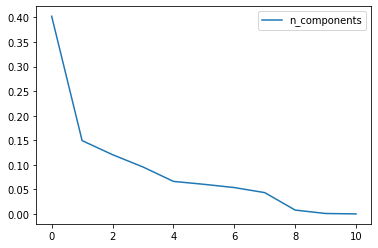

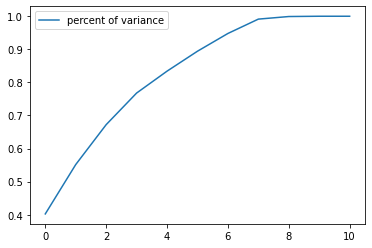

In [122]:
pd.DataFrame(d / d.sum(), columns = ["n_components"]).plot()
pd.DataFrame( np.cumsum(d / d.sum()), columns = ["percent of variance"]).plot()

In [123]:
prin_comps = X @ u[:, 0:8]

In [124]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
sk_prin_comps = pca.fit_transform(X)
np.allclose(np.abs(sk_prin_comps), np.abs(prin_comps))

True